<a href="https://colab.research.google.com/github/Rounik-Nikz/bank-loan-prediction/blob/main/Predicting_Bank_Loan_Approval_Using_Artificial_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Project is Contributed By: [Rounik Mondal](https://rounik-portfolio.netlify.app/)</br>Download the Report: [Click Here](https://drive.google.com/file/d/1Um5yo-DLpI0fQWhATxuZzTGyYQR8t5md/view?usp=drive_link)</br>Download the Dataset: [Click Here](https://drive.google.com/file/d/1t1ExflNkLSmEXUmviQzRyX-pPPf9Ak_O/view?usp=drive_link)</br>
</br>
**Please Note:** To facilitate the seamless execution of this project, kindly access the provided dataset by downloading it from the given link. Once downloaded, ensure to upload the dataset to the same directory as your Google Colab notebook. This ensures a harmonious integration of data for a smooth and efficient workflow.

In [ ]:
#Importing Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
import matplotlib.pyplot as plt

In [ ]:
#Reading the data which is provided in the same directory with name 'UniversalBank.csv' and storing it in bank_df variable
bank_df = pd.read_csv("UniversalBank.csv")

In [ ]:
#Displaying top 5 datapoints
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
#Displaying the shape of the data
bank_df.shape

(5000, 14)

In [ ]:
# Displaying basic information about the dataset
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
# Displaying statistical summary of the dataset
bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [ ]:
# Checking for missing values in the dataset
bank_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
# Calculating the average age in the dataset
avg_age = bank_df["Age"].mean()
print ("The average age of this dataset is {:.1f}.".format(avg_age))

The average age of this dataset is 45.3.


In [ ]:
# Calculating the percentage of customers that own the bank's credit card
percent_cc = sum(bank_df["CreditCard"] == 1)/len(bank_df)
print ("The percentage of customers that own the bank's credit card is {:.2%}.".format(percent_cc))

The percentage of customers that own the bank's credit card is 29.40%.


In [ ]:
# Calculating the percentage of customers that took out a personal loan
percent_loan = sum(bank_df["Personal Loan"] == 1)/len(bank_df)
print ("The percentage of customers that took out a personal loan is {:.2%}.".format(percent_loan))

The percentage of customers that took out a personal loan is 9.60%.


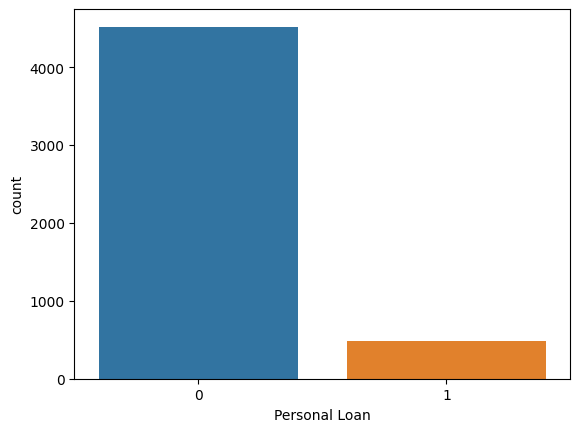

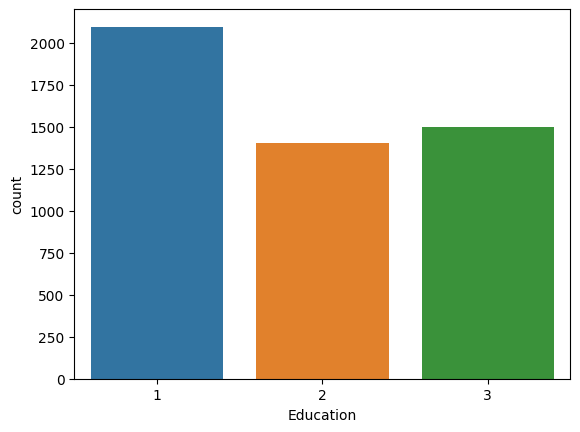

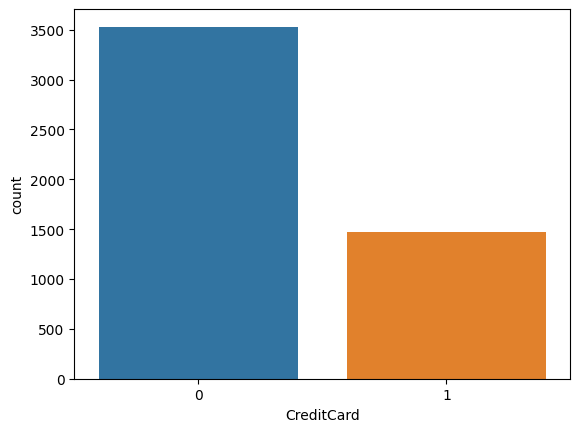

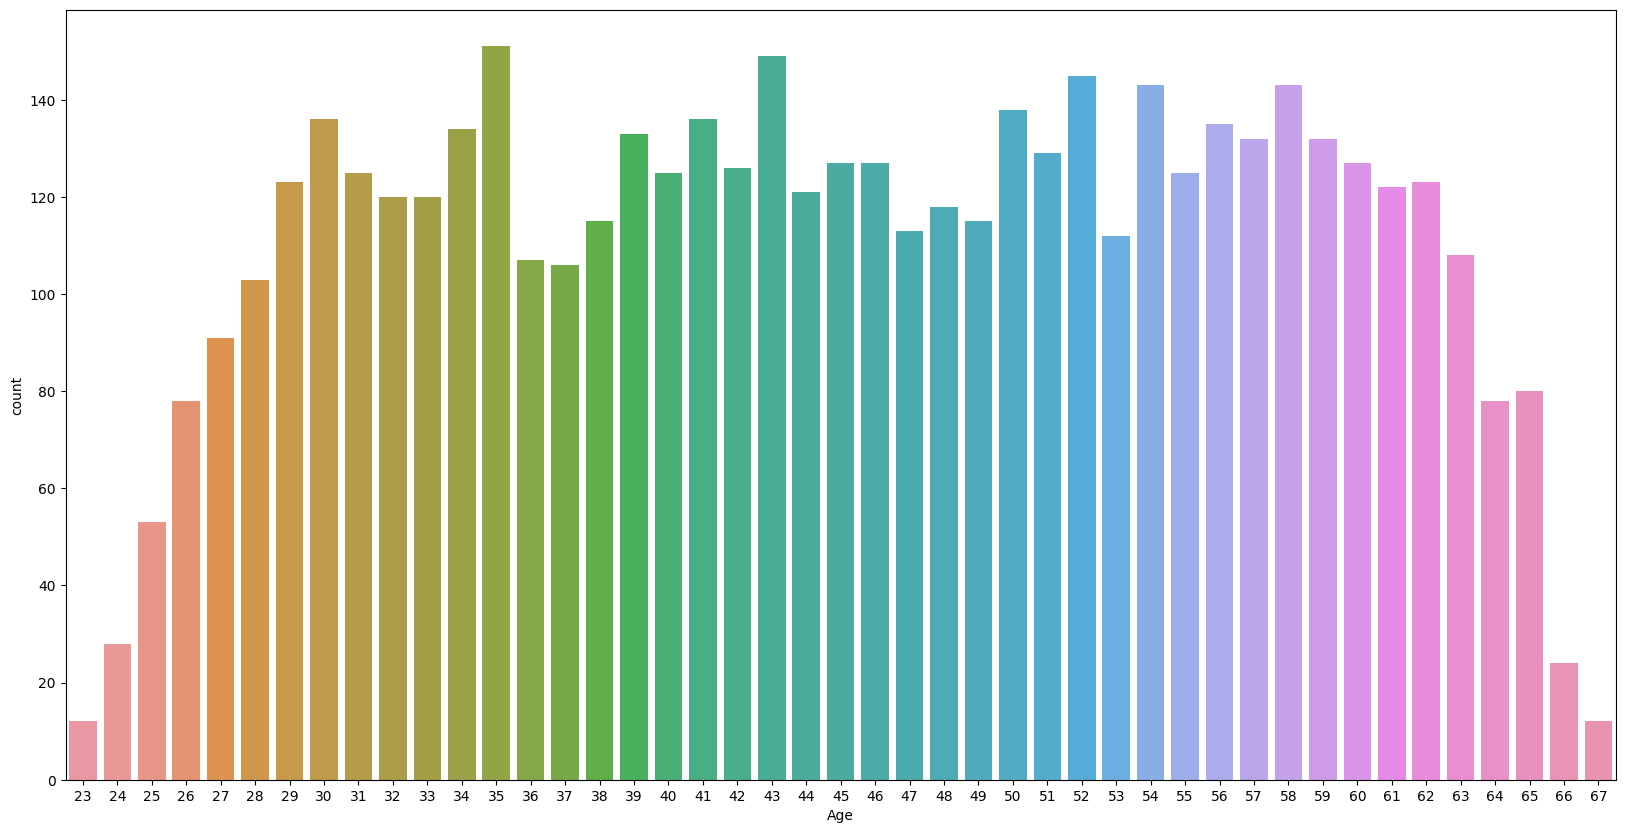

In [ ]:
# Visualizing the distribution of personal loans using a count plot
sns.countplot(x=bank_df["Personal Loan"])
plt.show()

# Visualizing the distribution of education levels using a count plot
sns.countplot(x=bank_df["Education"])
plt.show()

# Visualizing the distribution of credit card ownership using a count plot
sns.countplot(x=bank_df["CreditCard"])
plt.show()

# Visualizing the distribution of ages using a count plot
plt.figure(figsize=(20,10))
sns.countplot(x=bank_df["Age"])
plt.savefig('age.png', facecolor='w', bbox_inches='tight')
plt.show()

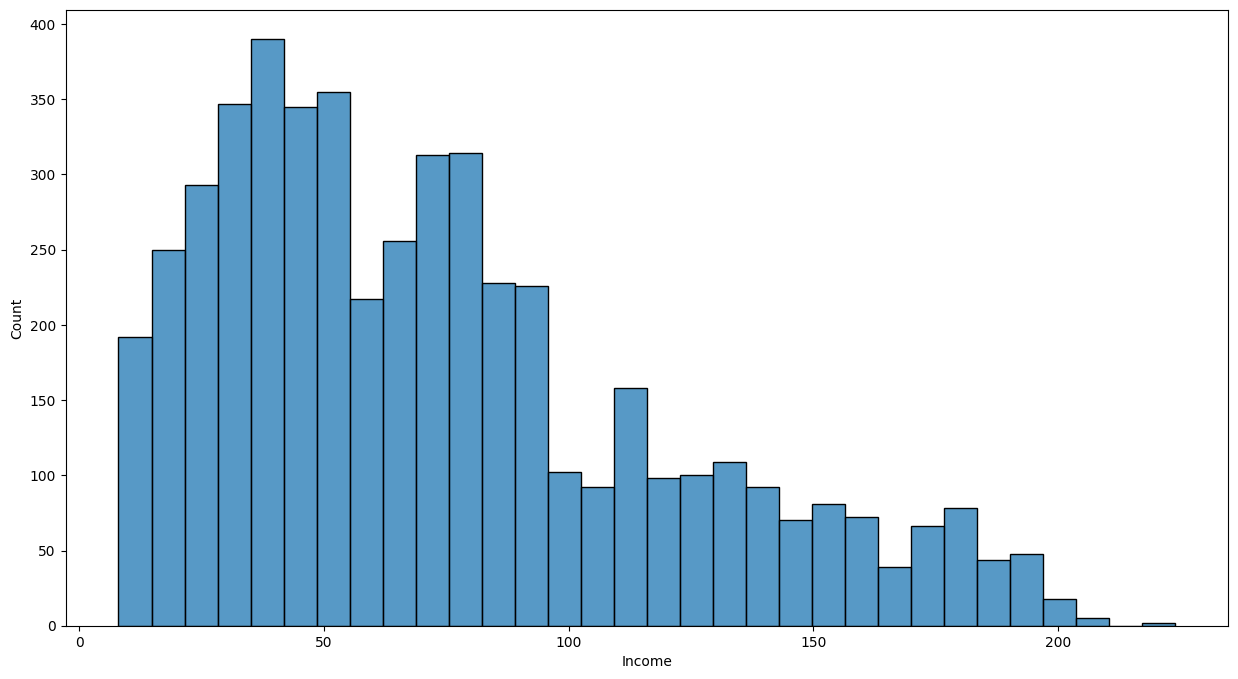

In [ ]:
# Visualizing the distribution of income using a histogram
plt.figure(figsize=(15,8))
sns.histplot(bank_df["Income"])
plt.savefig('income.png', facecolor='w', bbox_inches='tight')
plt.show()

In [ ]:
# Creating two dataframes: one with personal loans and one without personal loans
personal_loans = bank_df[bank_df['Personal Loan'] == 1].copy()
no_personal_loans = bank_df[bank_df['Personal Loan'] == 0].copy()

In [ ]:
# Displaying statistical summary of personal loan customers
personal_loans.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,480.0,2390.650000,1394.393674,10.0,1166.50,2342.0,3566.0000,4981.0
Age,480.0,45.066667,11.590964,26.0,35.00,45.0,55.0000,65.0
Experience,480.0,19.843750,11.582443,0.0,9.00,20.0,30.0000,41.0
Income,480.0,144.745833,31.584429,60.0,122.00,142.5,172.0000,203.0
ZIP Code,480.0,93153.202083,1759.223753,90016.0,91908.75,93407.0,94705.5000,96008.0
Family,480.0,2.612500,1.115393,1.0,2.00,3.0,4.0000,4.0
CCAvg,480.0,3.905354,2.097681,0.0,2.60,3.8,5.3475,10.0
Education,480.0,2.233333,0.753373,1.0,2.00,2.0,3.0000,3.0
Mortgage,480.0,100.845833,160.847862,0.0,0.00,0.0,192.5000,617.0
Personal Loan,480.0,1.000000,0.000000,1.0,1.00,1.0,1.0000,1.0


In [ ]:
# Displaying statistical summary of customers without personal loans
no_personal_loans.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,4520.0,2512.165487,1448.299331,1.0,1259.75,2518.5,3768.25,5000.0
Age,4520.0,45.367257,11.450427,23.0,35.00,45.0,55.00,67.0
Experience,4520.0,20.132301,11.456672,-3.0,10.00,20.0,30.00,43.0
Income,4520.0,66.237389,40.578534,8.0,35.00,59.0,84.00,224.0
ZIP Code,4520.0,93152.428761,2156.949654,9307.0,91911.00,93437.0,94608.00,96651.0
Family,4520.0,2.373451,1.148771,1.0,1.00,2.0,3.00,4.0
CCAvg,4520.0,1.729009,1.567647,0.0,0.60,1.4,2.30,8.8
Education,4520.0,1.843584,0.839975,1.0,1.00,2.0,3.00,3.0
Mortgage,4520.0,51.789381,92.038931,0.0,0.00,0.0,98.00,635.0
Personal Loan,4520.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


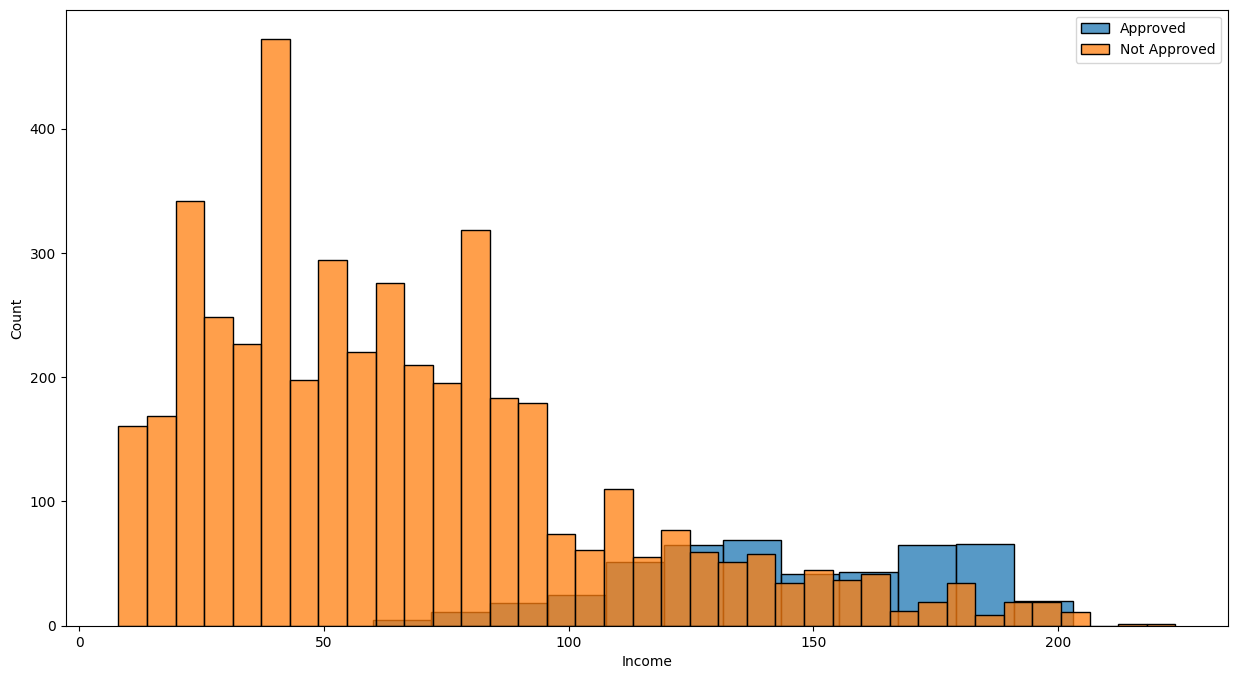

In [ ]:
# Visualizing the distribution of income for approved and not approved personal loans
plt.figure(figsize=(15,8))
sns.histplot(personal_loans["Income"], label='Approved')
sns.histplot(no_personal_loans["Income"], label='Not Approved')
plt.legend()
plt.savefig('approved_not_approved.png', facecolor='w', bbox_inches='tight')
plt.show()

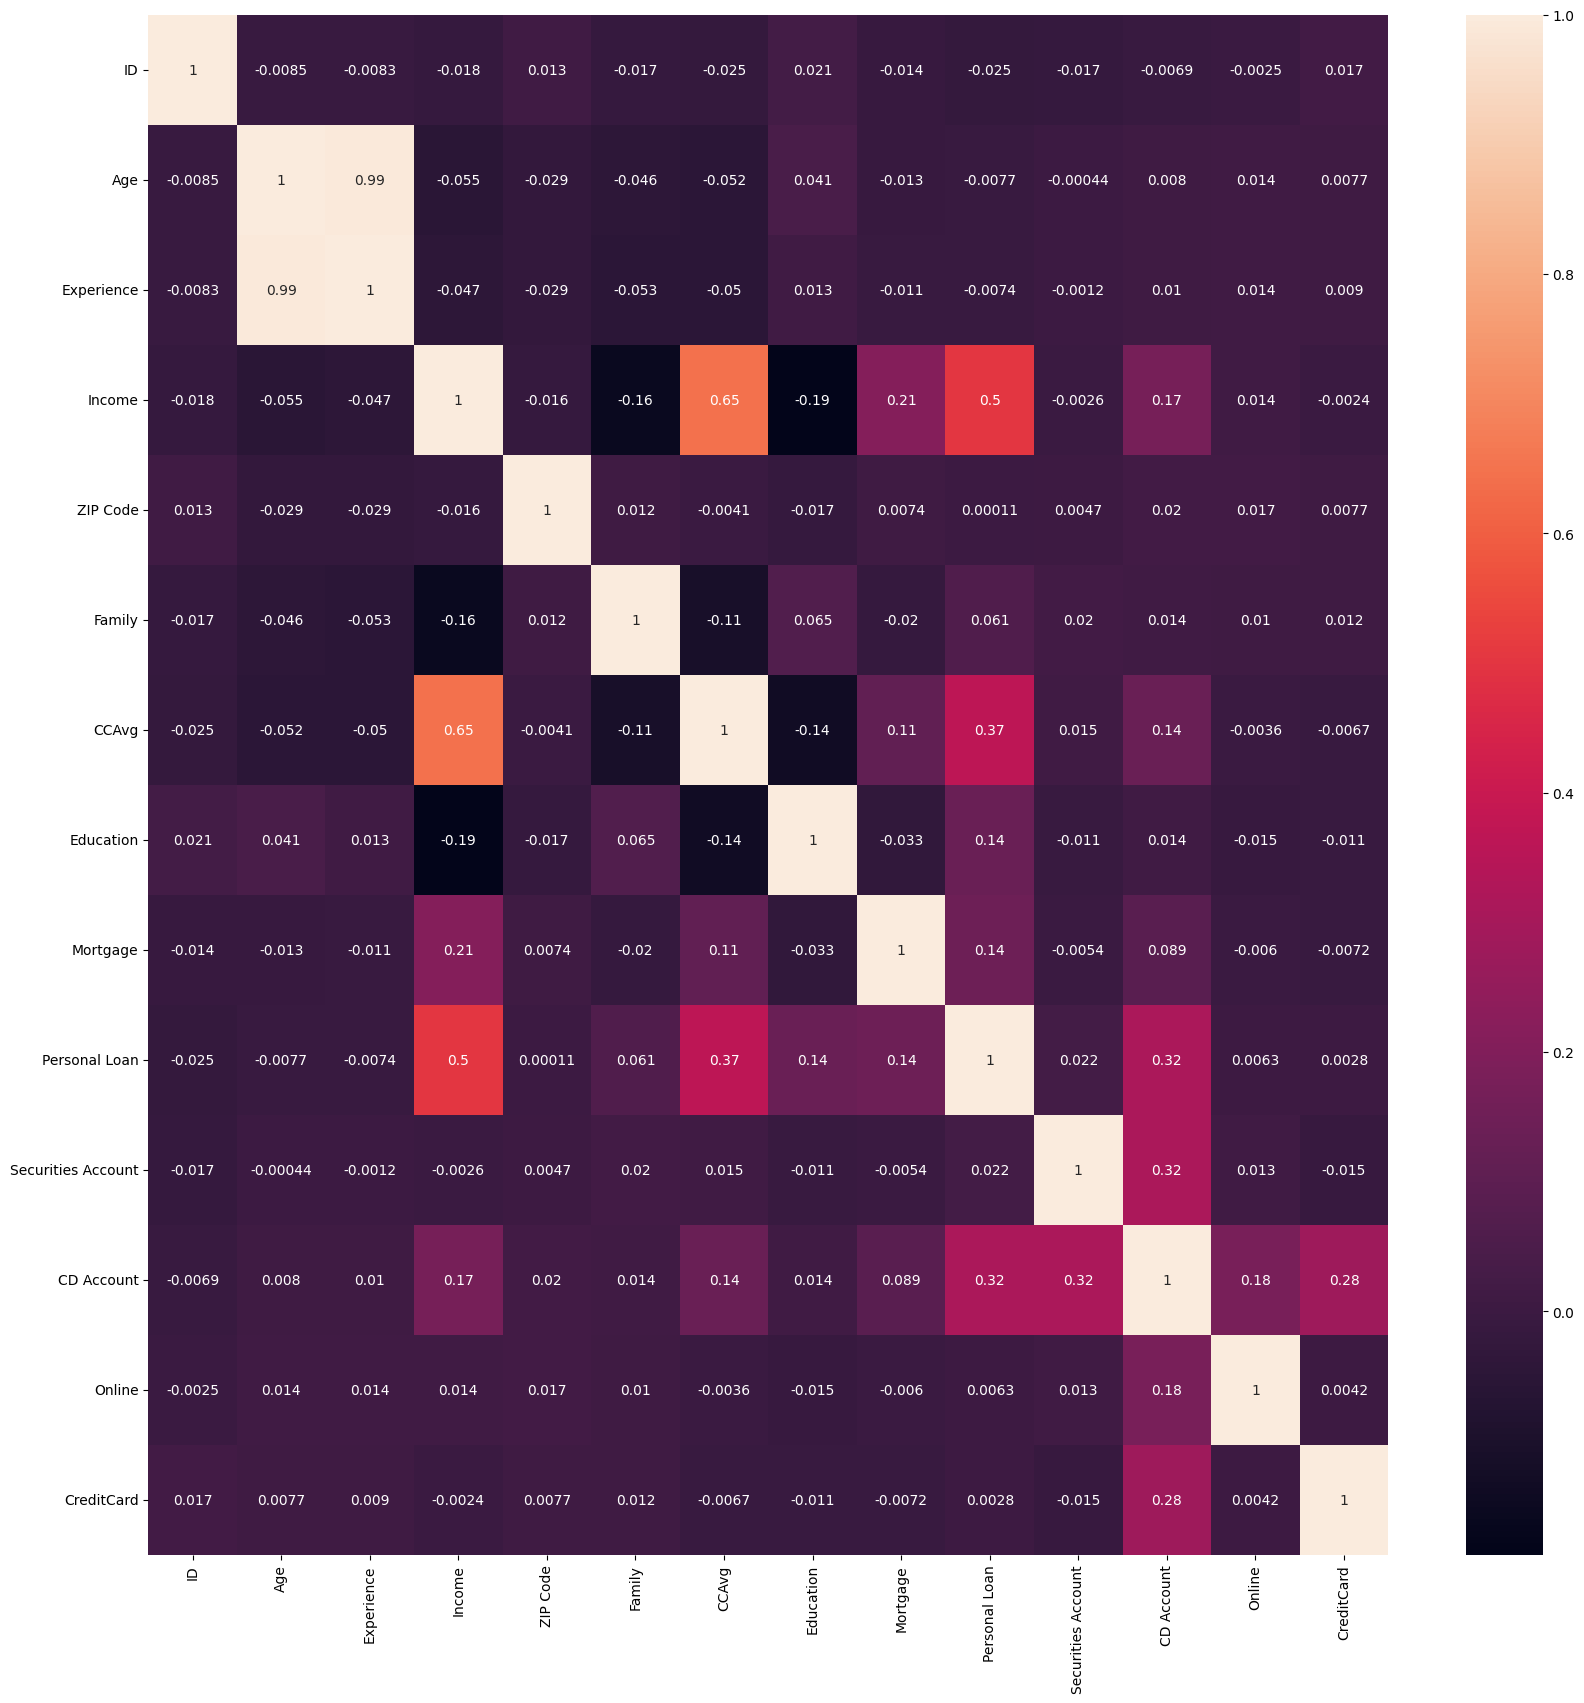

In [ ]:
# Calculating the correlation matrix and visualizing it using a heatmap
cm = bank_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cm, annot=True)
plt.savefig('heatmap.png', facecolor='w', bbox_inches='tight')
plt.show()

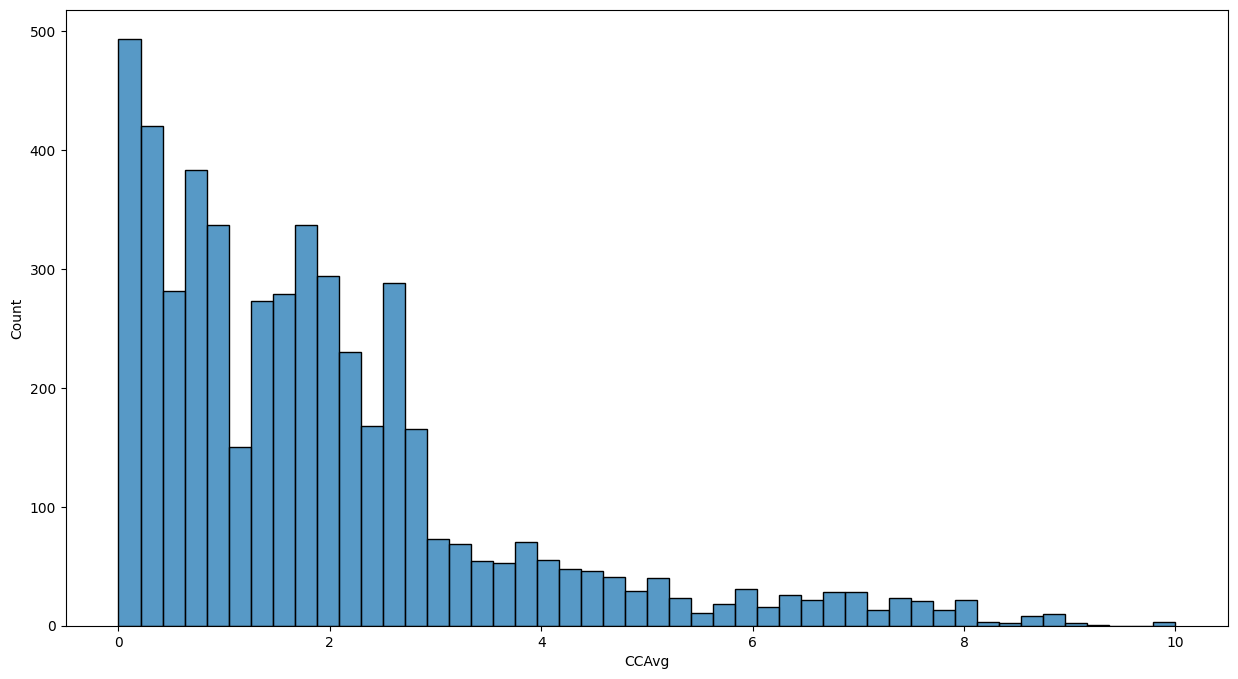

In [ ]:
# Visualizing the distribution of average credit card spending
plt.figure(figsize=(15,8))
sns.histplot(bank_df["CCAvg"])
plt.show()

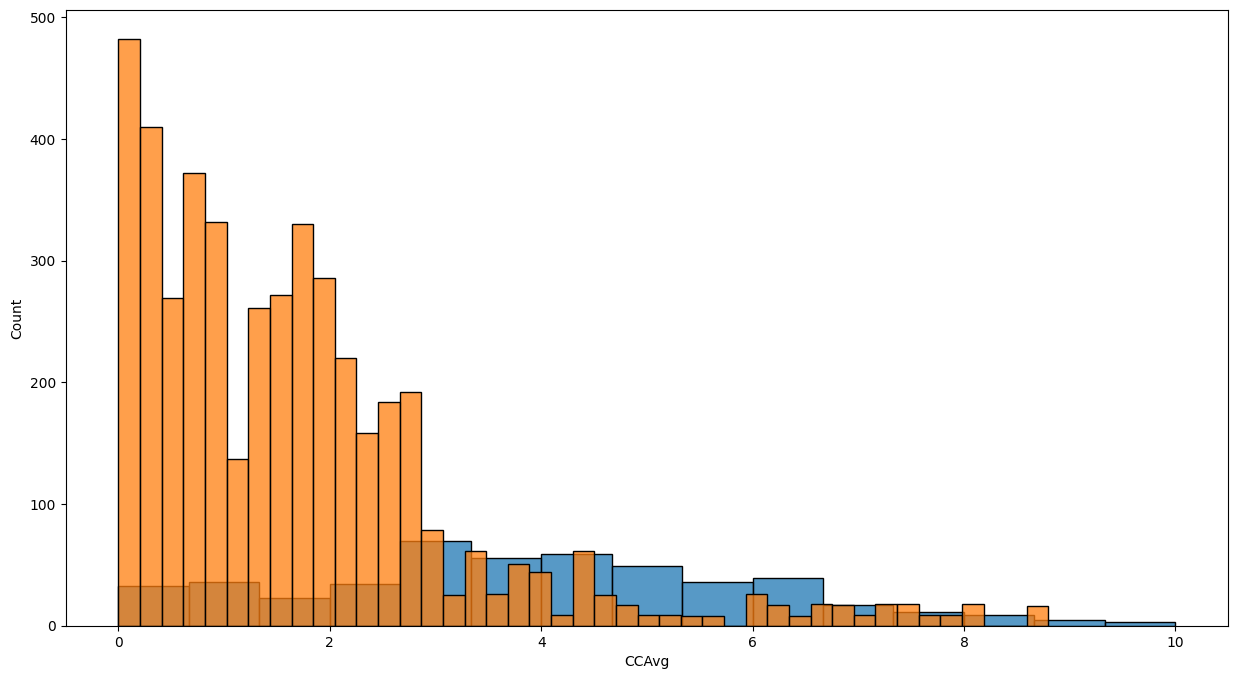

In [ ]:
# Visualizing the distribution of average credit card spending for approved and not approved personal loans
plt.figure(figsize=(15,8))
sns.histplot(personal_loans["CCAvg"])
sns.histplot(no_personal_loans["CCAvg"])
plt.show()

In [ ]:
# Splitting the dataset into features (X) and target variable (y)
from tensorflow.keras.utils import to_categorical

X = bank_df.drop(columns=["Personal Loan"])
y = bank_df["Personal Loan"]

# One-hot encoding the target variable
y = to_categorical(y)

In [ ]:
#Imported Required Libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Standardizing the features using StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4500, 13), (500, 13), (4500, 2), (500, 2))

In [ ]:
# Building the Artificial Neural Network (ANN) model using Keras
ann_model = keras.Sequential()

# Adding Dense Layer
ann_model.add(Dense(250, input_dim=13, kernel_initializer='normal', activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(500, activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(500, activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(500, activation='relu'))
ann_model.add(Dropout(0.4))
ann_model.add(Dense(250, activation='linear'))
ann_model.add(Dropout(0.4))

# Adding dense layer with softmax activation/output layer
ann_model.add(Dense(2, activation='softmax'))
# Diplaying the summary of the model
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 250)               3500      
                                                                 
 dropout (Dropout)           (None, 250)               0         
                                                                 
 dense_1 (Dense)             (None, 500)               125500    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dropout_2 (Dropout)         (None, 500)               0         
                                                                 
 dense_3 (Dense)             (None, 500)               2

In [ ]:
# Creating custom functions for f1, precision and recall using keras backend

from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
# Compiling the model with categorical crossentropy loss, custom F1 metric and adam optimizer algorithm
ann_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[f1_m]) # metrics=['accuracy']

In [ ]:
# Training the model with 20 epochs and 20% validation split
history = ann_model.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=1)

Epoch 1/20
113/113 [==============================] - 5s 23ms/step - loss: 0.1873 - f1_m: 0.9322 - val_loss: 0.1028 - val_f1_m: 0.9655
Epoch 2/20
113/113 [==============================] - 2s 21ms/step - loss: 0.1049 - f1_m: 0.9610 - val_loss: 0.0974 - val_f1_m: 0.9698
Epoch 3/20
113/113 [==============================] - 2s 14ms/step - loss: 0.0868 - f1_m: 0.9696 - val_loss: 0.0743 - val_f1_m: 0.9720
Epoch 4/20
113/113 [==============================] - 2s 14ms/step - loss: 0.0700 - f1_m: 0.9751 - val_loss: 0.0802 - val_f1_m: 0.9720
Epoch 5/20
113/113 [==============================] - 2s 15ms/step - loss: 0.0731 - f1_m: 0.9740 - val_loss: 0.0700 - val_f1_m: 0.9731
Epoch 6/20
113/113 [==============================] - 2s 15ms/step - loss: 0.0787 - f1_m: 0.9765 - val_loss: 0.0638 - val_f1_m: 0.9817
Epoch 7/20
113/113 [==============================] - 2s 15ms/step - loss: 0.0654 - f1_m: 0.9773 - val_loss: 0.0757 - val_f1_m: 0.9774
Epoch 8/20
113/113 [==============================] - 2

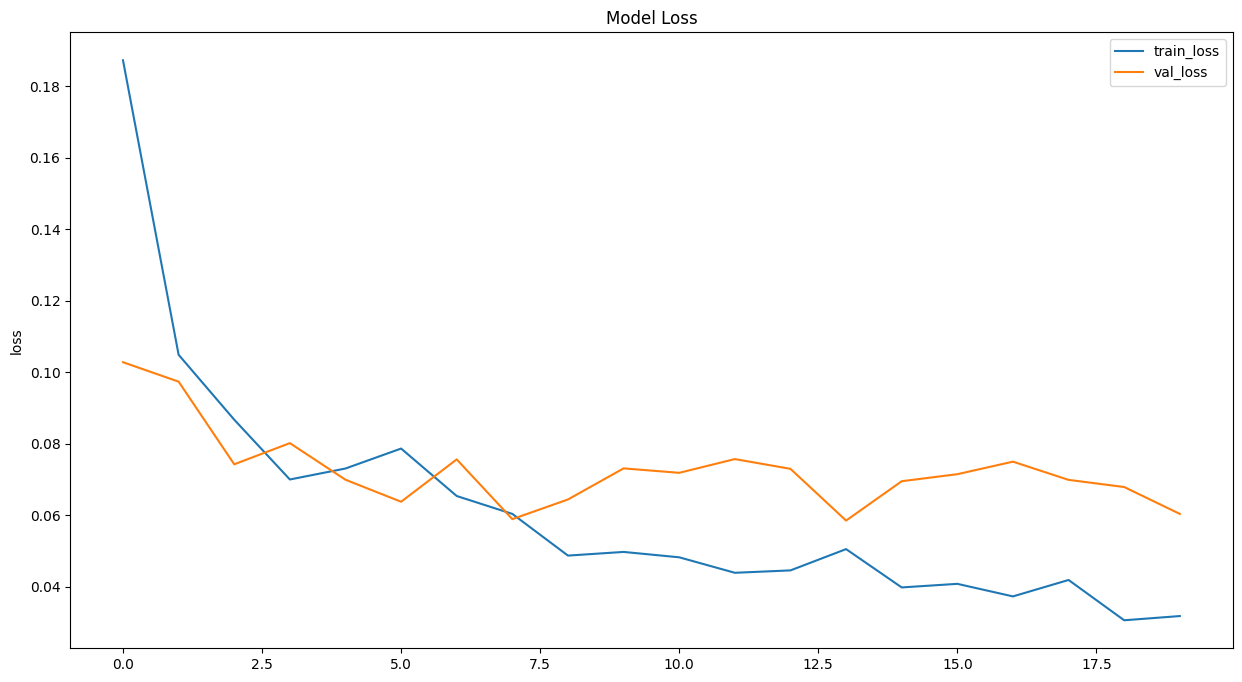

In [ ]:
# Plotting the model loss across epochs
plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.savefig('modelloss.png', facecolor='w', bbox_inches='tight')
plt.show()

In [ ]:
# Making predictions on the test set
predictions = ann_model.predict(X_test)
predict = []

for i in predictions:
    predict.append(np.argmax(i))

16/16 [==============================] - 1s 9ms/step


In [ ]:
#Importing Required Libraries
from sklearn import metrics

# Calculating and displaying various metrics for model evaluation
y_test = np.argmax(y_test, axis=1)
f1_test = metrics.f1_score(y_test, predict)
prec = metrics.precision_score(y_test, predict)
rec = metrics.recall_score(y_test, predict)
acc = metrics.accuracy_score(y_test, predict)

print ("F1 Score: {:.4f}.".format(f1_test))
print ("Precision: {:.4f}.".format(prec))
print ("Recall: {:.4f}.".format(rec))
print ("Accuracy: {:.4f}.".format(acc)) # Note: Accuracy may not be a good measure for this imbalanced dataset

F1 Score: 0.9053.
Precision: 0.9348.
Recall: 0.8776.
Accuracy: 0.9820.


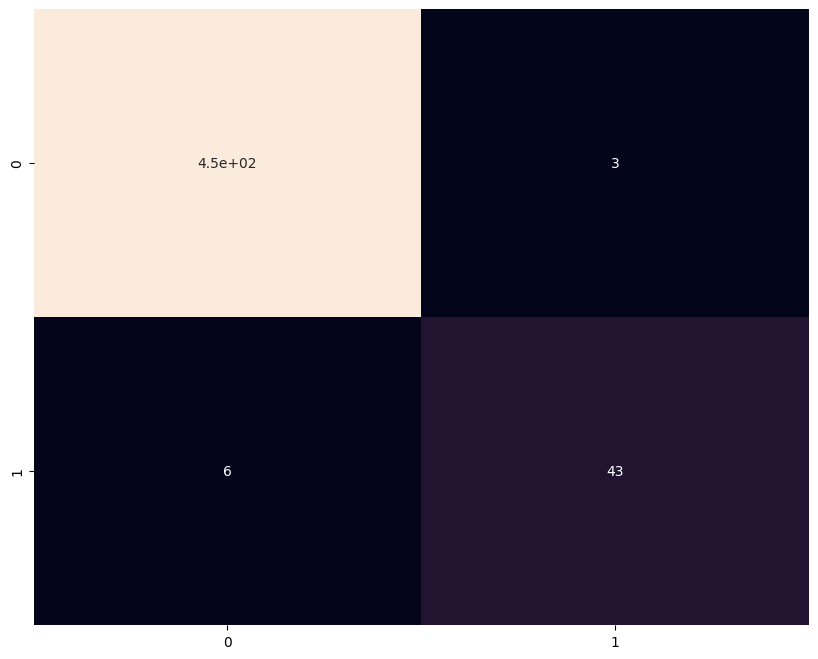

In [ ]:
# Creating and visualizing the confusion matrix
conf_mat = metrics.confusion_matrix(y_test, predict)
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, cbar=False)
plt.savefig('conf_matrix.png', facecolor='w', bbox_inches='tight')
plt.show()

In [ ]:
# Displaying the classification report using metrics classification report
print(metrics.classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       451
           1       0.93      0.88      0.91        49

    accuracy                           0.98       500
   macro avg       0.96      0.94      0.95       500
weighted avg       0.98      0.98      0.98       500

